In [17]:
import meta_evaluation; import meta_initialization; import random; import meta_mutation
import meta_parent_selection; import meta_recombination; import meta_survivor_selection
import Meta_Utility
import json
import numpy as np

# Meta EA Begins

#### INITIALIZE population with random candidate solutions

In [18]:
meta_popsize = 8; string_length = 8
meta_population = meta_initialization.meta_permutation(meta_popsize, string_length)

#### EVALUATE each candidate

In [19]:
meta_fitness_list = []
for meta_individual in meta_population:
    print("\n\nindividual=", meta_individual)
    meta_fitness = meta_evaluation.meta_evaluation(meta_individual) # you can change the parameters here
    print("meta_fitness[success_rate, time_taken, number_of_success_queens_found]=", meta_fitness)
    print(f'popsize:{meta_individual[0]}, tournament_size:{meta_individual[1]}, xover_rate:{meta_individual[2]}, mut_rate:{meta_individual[3]}')
    print(f'gen_limit:{meta_individual[4]}, string_length:{meta_individual[5]}, parent_selection_method:{meta_individual[6]}, survivor_selection_method:{meta_individual[7]}')
    meta_fitness_list.append(meta_fitness)



individual= [32, 4, 0.9673315246252484, 0.9266253680533867, 24, 8, 'tournament', 'random_uniform']
Evaluation Begins at:  2023-04-26 00:09:39
Evaluation Ends at: 2023-04-26 00:09:52.414959
Evaluation  takes : 0Hours: 0Minutes: 12Seconds
Time from start  : 0Hours: 0Minutes: 12Seconds
Time taken =  12.729282  s
meta_fitness[success_rate, time_taken, number_of_success_queens_found]= [0.001953125, 12.729282, 1]
popsize:32, tournament_size:4, xover_rate:0.9673315246252484, mut_rate:0.9266253680533867
gen_limit:24, string_length:8, parent_selection_method:tournament, survivor_selection_method:random_uniform


individual= [40, 4, 0.6207392742332587, 0.42485711242135316, 28, 8, 'tournament', 'random_uniform']
Evaluation Begins at:  2023-04-26 00:09:52
Evaluation Ends at: 2023-04-26 00:10:06.807038
Evaluation  takes : 0Hours: 0Minutes: 14Seconds
Time from start  : 0Hours: 0Minutes: 14Seconds
Time taken =  14.392079  s
meta_fitness[success_rate, time_taken, number_of_success_queens_found]= [0.

<Figure size 432x288 with 0 Axes>

#### REPEAT UNTIL (TERMINATION CONDITION is satisfied) DO
    1 SELECT parents;
    2 RECOMBINE pairs of parents;
    3 MUTATE the resulting offsprings
    4 EVALUATE new candidates;
    5 SELECT individuals for the next generation;

In [20]:
print("\n\nMeta main summary after initialization:")
# 新增语句开始
meta_sorted_fitness_list, meta_sorted_population, arrSortedIndex = Meta_Utility.arraySort(meta_fitness_list, meta_population)
print("meta_sorted_fitness_list=\n", meta_sorted_fitness_list)
print("meta_sorted_population=\n", meta_sorted_population)
print("arrSortedIndex=\n", arrSortedIndex)
# 新增语句结束


meta_gen_limit = 20; meta_mating_pool_size = int(meta_popsize/2); meta_xover_rate = 0.5; meta_gen = 0; meta_mut_rate = 0.5
average_fitness = []
average_queen = []
meta_sorted_fitness_history = []



Meta main summary after initialization:
meta_sorted_fitness_list=
 [[1.0, 4.364169, 92], [0.8578199052132701, 11.393881, 92], [0.8807692307692307, 15.079765, 92], [0.525390625, 7.110735, 90], [0.390625, 12.850884, 85], [0.0078125, 14.392079, 4], [0.001953125, 12.729282, 1], [0.001953125, 22.949822, 1]]
meta_sorted_population=
 [[88, 4, 0.2258620572907616, 0.8572377186846543, 42, 8, 'random_uniform', 'replacement'], [84, 4, 0.3375526871756046, 0.6745366976180577, 30, 8, 'MPS', 'replacement'], [72, 4, 0.2607396268658162, 0.330315738703453, 48, 8, 'MPS', 'mu_plus_lambda'], [52, 4, 0.4395486364543224, 0.366478489603852, 13, 8, 'MPS', 'mu_plus_lambda'], [20, 4, 0.8927041489203578, 0.6009240038500974, 46, 8, 'tournament', 'replacement'], [40, 4, 0.6207392742332587, 0.42485711242135316, 28, 8, 'tournament', 'random_uniform'], [32, 4, 0.9673315246252484, 0.9266253680533867, 24, 8, 'tournament', 'random_uniform'], [56, 4, 0.41604931882913865, 0.5610758598281461, 39, 8, 'MPS', 'random_uniform'

In [21]:
while meta_gen < meta_gen_limit:

    # 1 SELECT parents;
    # pick parents
    # 第48行parent_fittness只按照一维,也就是三维, meta_fitness_list的第[0]维计算，没有计算三维，
    # 导致meta_parent_selection.meta_tournament和meta_parent_selection.meta_tournament中有多个fitness为“1”,
    # 进而导致进入死循环

    """发现一个错误tournament size不是8"""# meta_parents_index = meta_parent_selection.meta_tournament(meta_fitness_list, meta_mating_pool_size, 8)
    meta_parents_index = meta_parent_selection.meta_tournament(meta_fitness_list, meta_mating_pool_size, 4)
    #meta_parents_index = meta_parent_selection.meta_MPS(meta_fitness_list, meta_mating_pool_size)
    # in order to randomly pair up parents
    random.shuffle(meta_parents_index)
    # offspring are generated using selected parents in the mating pool

    # 2 RECOMBINE pairs of parents;
    # 3 MUTATE the resulting offsprings
    # 4 EVALUATE new candidates;
    meta_offspring =[]
    meta_offspring_fitness = []
    i= 0 # initialize the counter for parents in the mating pool

    while len(meta_offspring) < meta_mating_pool_size:
        #看Ting Hu程序里面main的line 59到line 77
        # 2 RECOMBINE pairs of parents;
        # recombination
        if random.random() < meta_xover_rate:
            off1,off2 = meta_recombination.permutation_cut_and_crossfill(meta_population[meta_parents_index[i]], meta_population[meta_parents_index[i+1]])
        else:
            off1 = meta_population[meta_parents_index[i]].copy()
            off2 = meta_population[meta_parents_index[i+1]].copy()
        # 3 MUTATE the resulting offsprings
        # mutation
        if random.random() < meta_mut_rate:
            off1 = meta_mutation.permutation_swap(off1)
        if random.random() < meta_mut_rate:
            off2 = meta_mutation.permutation_swap(off2)
        # 4 EVALUATE new candidates;
        meta_offspring.append(off1)
        meta_offspring_fitness.append(meta_evaluation.meta_evaluation(off1))
        meta_offspring.append(off2)
        meta_offspring_fitness.append(meta_evaluation.meta_evaluation(off2))

    # 5 SELECT individuals for the next generation;
    """发现一个错误meta_fitness未传回去，此处应改成meta_fitness_list"""#meta_population, meta_fitness = meta_survivor_selection.meta_mu_plus_lambda(meta_population, meta_fitness_list, meta_offspring, meta_offspring_fitness)
    meta_population, meta_fitness_list = meta_survivor_selection.meta_mu_plus_lambda(meta_population, meta_fitness_list, meta_offspring, meta_offspring_fitness) #
    #meta_population, meta_fitness = meta_survivor_selection.meta_replacement(meta_population, meta_fitness_list, meta_offspring, meta_offspring_fitness)

    fitness_acc = [meta_fitness_list[i][0] for i in range(len(meta_fitness_list))]
    queen_found = [meta_fitness_list[i][2] for i in range(len(meta_fitness_list))]
    average_fitness.append(sum(fitness_acc)/len(fitness_acc))
    average_queen.append(sum(queen_found)/len(queen_found))
    print("The average fitness in this generation is:", average_fitness[-1])
    print("The average qualified solutions in theis generation is:", average_queen[-1])
    print(f"\n\nMeta main summary at meta_generation of {meta_gen}: ")
    meta_sorted_fitness_list, meta_sorted_population, arrSortedIndex = Meta_Utility.arraySort(meta_fitness_list,meta_population)
    # for i in range(len(meta_sorted_fitness_list)):
    #     print("meta_fitness[success_rate, time_taken, number_of_success_queens_found]=",[meta_sorted_fitness_list[i][0], meta_sorted_fitness_list[i][1], meta_sorted_fitness_list[i][2]])
    #     print(f'popsize:{meta_sorted_population[i][0]}, tournament_size:{meta_sorted_population[i][1]}, xover_rate:{meta_sorted_population[i][2]}, mut_rate:{meta_sorted_population[i][3]}')
    #     print(f'gen_limit:{meta_sorted_population[i][4]}, string_length:{meta_sorted_population[i][5]}, parent_selection_method:{meta_sorted_population[i][6]}, survivor_selection_method:{meta_sorted_population[i][7]}')
    print("\nmeta_fitness[success_rate, time_taken, number_of_success_queens_found]=\n", meta_sorted_fitness_list)
    print("meta_population = \n", meta_sorted_population)
    meta_sorted_fitness_history.append(meta_sorted_fitness_list)
    meta_gen = meta_gen + 1

Evaluation Begins at:  2023-04-26 00:11:20
Evaluation Ends at: 2023-04-26 00:11:49.170223
Evaluation  takes : 0Hours: 0Minutes: 28Seconds
Time from start  : 0Hours: 0Minutes: 28Seconds
Time taken =  28.571075  s
Evaluation Begins at:  2023-04-26 00:11:49
Evaluation Ends at: 2023-04-26 00:12:05.251658
Evaluation  takes : 0Hours: 0Minutes: 16Seconds
Time from start  : 0Hours: 0Minutes: 16Seconds
Time taken =  16.081435  s
Evaluation Begins at:  2023-04-26 00:12:05
Evaluation Ends at: 2023-04-26 00:12:16.608494
Evaluation  takes : 0Hours: 0Minutes: 11Seconds
Time from start  : 0Hours: 0Minutes: 11Seconds
Time taken =  11.356836  s
Evaluation Begins at:  2023-04-26 00:12:16
Evaluation Ends at: 2023-04-26 00:12:32.648269
Evaluation  takes : 0Hours: 0Minutes: 16Seconds
Time from start  : 0Hours: 0Minutes: 16Seconds
Time taken =  16.039775  s
The average fitness in this generation is: 0.4646380951228126
The average qualified solutions in theis generation is: 60.125


Meta main summary at meta

<Figure size 432x288 with 0 Axes>

In [22]:
json_object = json.dumps(average_fitness, indent=4)
with open("result_fitness.json", "w") as outfile:
    outfile.write(json_object)

json_object = json.dumps(average_queen, indent=4)
with open("result_queens.json", "w") as outfile:
    outfile.write(json_object)

In [23]:
print("\n\nMeta main summary at end: ")
meta_sorted_fitness_list, meta_sorted_population, arrSortedIndex = Meta_Utility.arraySort(meta_fitness_list,meta_population)
# for i in range(len(meta_sorted_fitness_list)):
#     print("meta_fitness[success_rate, time_taken, number_of_success_queens_found]=", [meta_sorted_fitness_list[i][0],meta_sorted_fitness_list[i][1],meta_sorted_fitness_list[i][2]])
#     print( f'popsize:{meta_sorted_population[i][0]}, tournament_size:{meta_sorted_population[i][1]}, xover_rate:{meta_sorted_population[i][2]}, mut_rate:{meta_sorted_population[i][3]}')
#     print(f'gen_limit:{meta_sorted_population[i][4]}, string_length:{meta_sorted_population[i][5]}, parent_selection_method:{meta_sorted_population[i][6]}, survivor_selection_method:{meta_sorted_population[i][7]}')
print("\nmeta_fitness[success_rate, time_taken, number_of_success_queens_found]=\n",meta_sorted_fitness_list)
print("meta_population = \n", meta_sorted_population)
print(f"meta_sorted_fitness_history = \n{meta_sorted_fitness_history}")



Meta main summary at end: 

meta_fitness[success_rate, time_taken, number_of_success_queens_found]=
 [[1.0, 2.40917, 92], [1.0, 2.420991, 92], [1.0, 2.449135, 92], [1.0, 2.604318, 92], [1.0, 2.677382, 92], [1.0, 2.686961, 92], [1.0, 2.699083, 92], [1.0, 2.8081199999999997, 92]]
meta_population = 
 [[100, 4, 0.042099605463218115, 0.8572377186846543, 42, 8, 'random_uniform', 'replacement'], [100, 4, 0.042099605463218115, 0.8572377186846543, 42, 8, 'random_uniform', 'replacement'], [100, 4, 0.042099605463218115, 0.8572377186846543, 42, 8, 'random_uniform', 'replacement'], [100, 4, 0.042099605463218115, 0.8572377186846543, 42, 8, 'random_uniform', 'replacement'], [100, 4, 0.042099605463218115, 0.8572377186846543, 42, 8, 'random_uniform', 'replacement'], [100, 4, 0.042099605463218115, 0.8572377186846543, 42, 8, 'random_uniform', 'replacement'], [40, 4, 0.042099605463218115, 0.8287010982891274, 42, 8, 'random_uniform', 'replacement'], [100, 4, 0.042099605463218115, 0.8572377186846543, 37, 

#### The Best Chroma Found so far and its Fitness

In [24]:
print("\nmeta_fitness[success_rate, time_taken, number_of_success_queens_found]=\n",meta_sorted_fitness_list[0])
print("\nBest Chrome(HyperParameter Set[popsize, tournament_size, xover_rate, mut_rate, gen_limit, string_length, parent_selection_method, survivor_selection_method]) = \n", meta_sorted_population[0])


meta_fitness[success_rate, time_taken, number_of_success_queens_found]=
 [1.0, 2.40917, 92]

Best Chrome(HyperParameter Set[popsize, tournament_size, xover_rate, mut_rate, gen_limit, string_length, parent_selection_method, survivor_selection_method]) = 
 [100, 4, 0.042099605463218115, 0.8572377186846543, 42, 8, 'random_uniform', 'replacement']


## Fitness Visualization

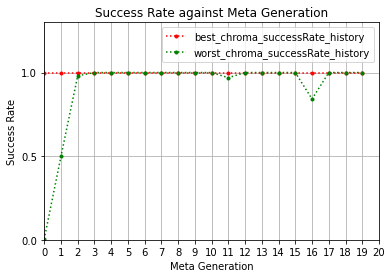

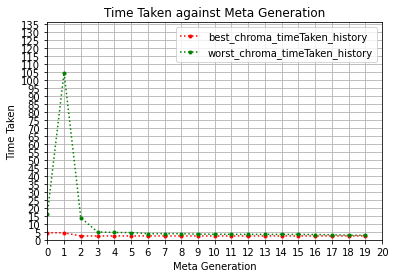

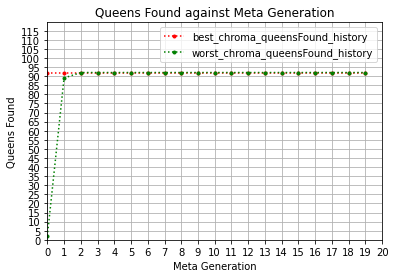

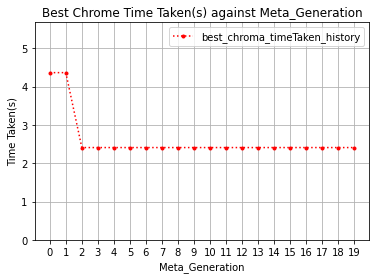

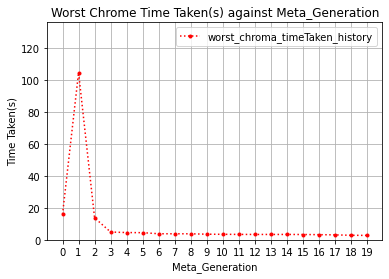

In [25]:
best_chroma_successRate_history = []
best_chroma_timeTaken_history = []
best_chroma_queensFound_history = []
worst_chroma_successRate_history = []
worst_chroma_timeTaken_history = []
worst_chroma_queensFound_history = []
for data in meta_sorted_fitness_history:
    best_chroma_successRate_history.append(data[0][0])
    best_chroma_timeTaken_history.append(data[0][1])
    best_chroma_queensFound_history.append(data[0][2])
    worst_chroma_successRate_history.append(data[-1][0])
    worst_chroma_timeTaken_history.append(data[-1][1])
    worst_chroma_queensFound_history.append(data[-1][2])

Meta_Utility.plot_2_curves(curve_1=best_chroma_successRate_history, curve_2=worst_chroma_successRate_history, legend_1="best_chroma_successRate_history", legend_2="worst_chroma_successRate_history", pic_title="Success Rate against Meta Generation", xLabel ="Meta Generation", yLabel = "Success Rate", y_major_locator_=0.5)
Meta_Utility.plot_2_curves(curve_1=best_chroma_timeTaken_history, curve_2=worst_chroma_timeTaken_history, legend_1="best_chroma_timeTaken_history", legend_2="worst_chroma_timeTaken_history", pic_title="Time Taken against Meta Generation", xLabel ="Meta Generation", yLabel = "Time Taken", y_major_locator_=5)
Meta_Utility.plot_2_curves(curve_1=best_chroma_queensFound_history, curve_2=worst_chroma_queensFound_history, legend_1="best_chroma_queensFound_history", legend_2="worst_chroma_queensFound_history", pic_title="Queens Found against Meta Generation", xLabel ="Meta Generation", yLabel = "Queens Found", y_major_locator_=5)
Meta_Utility.plot_1_curves(curve_1=best_chroma_timeTaken_history, legend_1="best_chroma_timeTaken_history", pic_title="Best Chrome Time Taken(s) against Meta_Generation", xLabel="Meta_Generation", yLabel="Time Taken(s)", y_major_locator_=5)
Meta_Utility.plot_1_curves(curve_1=worst_chroma_timeTaken_history, legend_1="worst_chroma_timeTaken_history", pic_title="Worst Chrome Time Taken(s) against Meta_Generation", xLabel="Meta_Generation", yLabel="Time Taken(s)", y_major_locator_=0.1)

## Best Chrome Statistically Verification

#### Apply the Best Chrome for 20 Times to evaluate ots Fitness


In [26]:
import meta_evaluation_show_best_queens
import Meta_Utility
import numpy as np

# meta_individual = [96, 4, 0.16488956325207138, 0.9579884408877614, 30, 8, 'random_uniform', 'mu_plus_lambda']
#meta_individual = [36, 4, 0.04714546455380708, 0.8512582568871577, 30, 7, 'random_uniform', 'replacement']
# meta_individual = [20, 4, 0.15632274106311306, 0.4322126827854611, 30, 8, 'MPS', 'mu_plus_lambda']

# meta_individual =  [48, 4, 0.31490507410521784, 0.872321692392847, 30, 8, 'random_uniform', 'mu_plus_lambda']
meta_individual_for_test = meta_sorted_population[0]
meta_fitness_list_for_test = []
meta_fitness_list_success_rate_for_test=[]
meta_fitness_list_time_taken_for_test = []
meta_fitness_list_queens_found_for_test = []
for i in range(20):
    print("\n\ni=", i)
    print("\n\nindividual=", meta_individual_for_test)
    meta_fitness, best_queens = meta_evaluation_show_best_queens.meta_evaluation_show_best_queens(meta_individual_for_test)  # you can change the parameters here
    print("meta_fitness[success_rate, time_taken, number_of_success_queens_found]=", meta_fitness)
    print(
        f'popsize:{meta_individual_for_test[0]}, tournament_size:{meta_individual_for_test[1]}, xover_rate:{meta_individual_for_test[2]}, mut_rate:{meta_individual_for_test[3]}')
    print(
        f'gen_limit:{meta_individual_for_test[4]}, string_length:{meta_individual_for_test[5]}, parent_selection_method:{meta_individual_for_test[6]}, survivor_selection_method:{meta_individual_for_test[7]}')
    meta_fitness_list_for_test.append(meta_fitness)
    meta_fitness_list_success_rate_for_test.append(meta_fitness[0])
    meta_fitness_list_time_taken_for_test.append(meta_fitness[1])
    meta_fitness_list_queens_found_for_test.append(meta_fitness[2])



i= 0


individual= [100, 4, 0.042099605463218115, 0.8572377186846543, 42, 8, 'random_uniform', 'replacement']
Evaluation Begins at:  2023-04-26 00:24:42
Evaluation Ends at: 2023-04-26 00:24:46.732290
Evaluation  takes : 0Hours: 0Minutes: 3Seconds
Time from start  : 0Hours: 0Minutes: 3Seconds
Time taken =  3.831743  s
meta_fitness[success_rate, time_taken, number_of_success_queens_found]= [1.0, 3.831743, 92]
popsize:100, tournament_size:4, xover_rate:0.042099605463218115, mut_rate:0.8572377186846543
gen_limit:42, string_length:8, parent_selection_method:random_uniform, survivor_selection_method:replacement


i= 1


individual= [100, 4, 0.042099605463218115, 0.8572377186846543, 42, 8, 'random_uniform', 'replacement']
Evaluation Begins at:  2023-04-26 00:24:46
Evaluation Ends at: 2023-04-26 00:24:51.637260
Evaluation  takes : 0Hours: 0Minutes: 4Seconds
Time from start  : 0Hours: 0Minutes: 4Seconds
Time taken =  4.9049700000000005  s
meta_fitness[success_rate, time_taken, number_of_succe

<Figure size 432x288 with 0 Axes>

In [27]:
print(f"meta_fitness_list_for_test = \n{meta_fitness_list_for_test}")

meta_fitness_list_for_test = 
[[1.0, 3.831743, 92], [1.0, 4.9049700000000005, 92], [1.0, 4.827075, 92], [1.0, 3.779276, 92], [1.0, 3.267493, 92], [1.0, 3.7470280000000002, 92], [1.0, 2.973287, 92], [1.0, 4.152336, 92], [1.0, 4.265039, 92], [1.0, 3.574023, 92], [1.0, 2.392288, 92], [1.0, 2.481564, 92], [1.0, 5.153482, 92], [1.0, 4.26924, 92], [1.0, 3.294349, 92], [1.0, 4.643389, 92], [1.0, 2.55159, 92], [1.0, 3.974851, 92], [1.0, 4.055584, 92], [1.0, 3.687964, 92]]


In [28]:
meta_fitness_list_success_rate_for_test_average = np.mean(meta_fitness_list_success_rate_for_test)
meta_fitness_list_success_rate_for_test_var = np.var(meta_fitness_list_success_rate_for_test)
meta_fitness_list_success_rate_for_test_std = np.std(meta_fitness_list_success_rate_for_test)
print("meta_fitness_list_success_rate_for_test_average=",meta_fitness_list_success_rate_for_test_average)
print("meta_fitness_list_success_rate_for_test_var=",meta_fitness_list_success_rate_for_test_var)
print("meta_fitness_list_success_rate_for_test_std=",meta_fitness_list_success_rate_for_test_std)

meta_fitness_list_success_rate_for_test_average= 1.0
meta_fitness_list_success_rate_for_test_var= 0.0
meta_fitness_list_success_rate_for_test_std= 0.0


In [29]:
meta_fitness_list_time_taken_for_test_average = np.mean(meta_fitness_list_time_taken_for_test)
meta_fitness_list_time_taken_for_test_var = np.var(meta_fitness_list_time_taken_for_test)
meta_fitness_list_time_taken_for_test_std = np.std(meta_fitness_list_time_taken_for_test)
print("meta_fitness_list_time_taken_for_test_average=",meta_fitness_list_time_taken_for_test_average)
print("meta_fitness_list_time_taken_for_test_var=",meta_fitness_list_time_taken_for_test_var)
print("meta_fitness_list_time_taken_for_test_std=",meta_fitness_list_time_taken_for_test_std)

meta_fitness_list_time_taken_for_test_average= 3.7913285500000002
meta_fitness_list_time_taken_for_test_var= 0.6021528240867475
meta_fitness_list_time_taken_for_test_std= 0.7759850669225198


In [30]:
meta_fitness_list_queens_found_for_test_average = np.mean(meta_fitness_list_queens_found_for_test)
meta_fitness_list_queens_found_for_test_var = np.var(meta_fitness_list_queens_found_for_test)
meta_fitness_list_queens_found_for_test_std = np.std(meta_fitness_list_queens_found_for_test)
print("meta_fitness_list_queens_found_for_test_average=",meta_fitness_list_queens_found_for_test_average)
print("meta_fitness_list_queens_found_for_test_var=",meta_fitness_list_queens_found_for_test_var)
print("meta_fitness_list_queens_found_for_test_std=",meta_fitness_list_queens_found_for_test_std)

meta_fitness_list_queens_found_for_test_average= 92.0
meta_fitness_list_queens_found_for_test_var= 0.0
meta_fitness_list_queens_found_for_test_std= 0.0


## Best Chrome Statistically Verification - Visualized

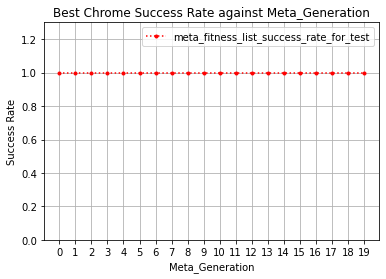

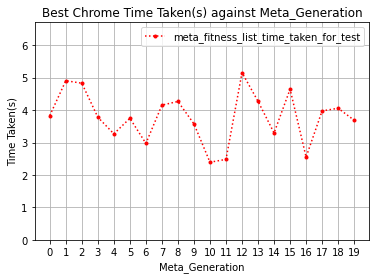

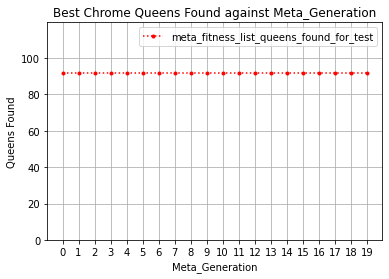

In [31]:
Meta_Utility.plot_1_curves(curve_1=meta_fitness_list_success_rate_for_test, legend_1="meta_fitness_list_success_rate_for_test", pic_title="Best Chrome Success Rate against Meta_Generation", xLabel="Meta_Generation", yLabel="Success Rate", y_major_locator_=0.1)
Meta_Utility.plot_1_curves(curve_1=meta_fitness_list_time_taken_for_test, legend_1="meta_fitness_list_time_taken_for_test", pic_title="Best Chrome Time Taken(s) against Meta_Generation", xLabel="Meta_Generation", yLabel="Time Taken(s)", y_major_locator_=5)
Meta_Utility.plot_1_curves(curve_1=meta_fitness_list_queens_found_for_test, legend_1="meta_fitness_list_queens_found_for_test", pic_title="Best Chrome Queens Found against Meta_Generation", xLabel="Meta_Generation", yLabel="Queens Found", y_major_locator_=5)

### Found Queens Visualization

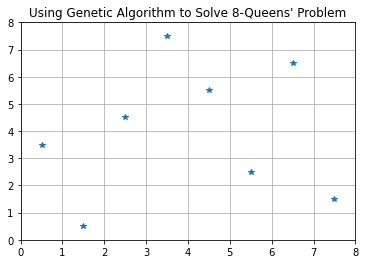

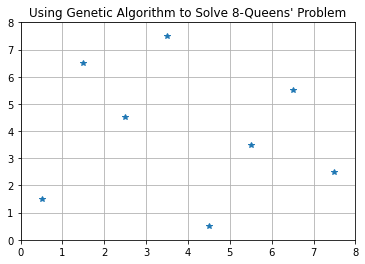

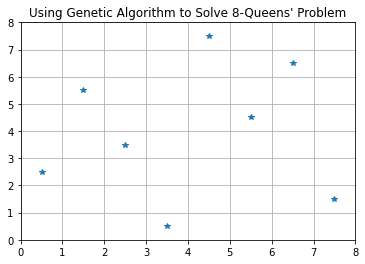

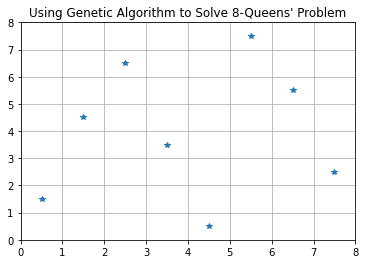

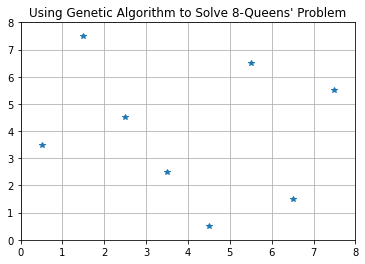

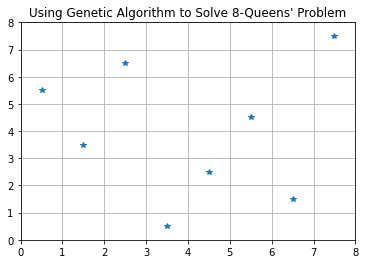

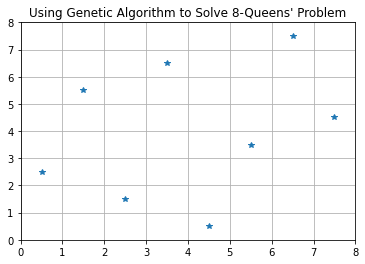

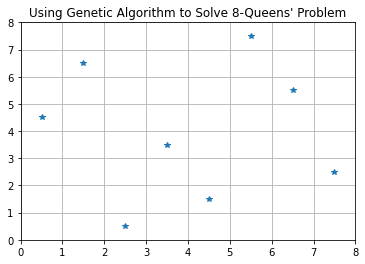

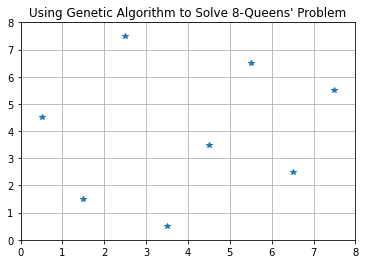

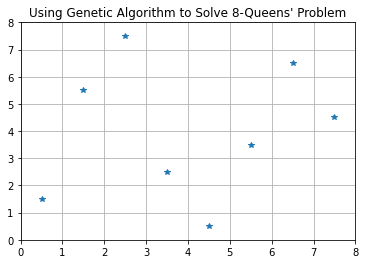

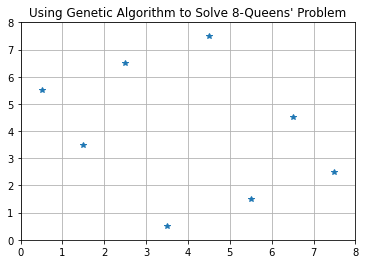

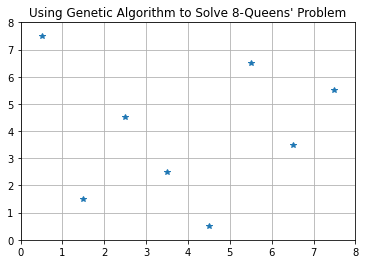

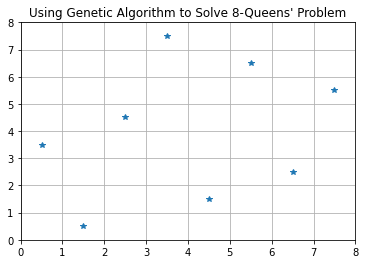

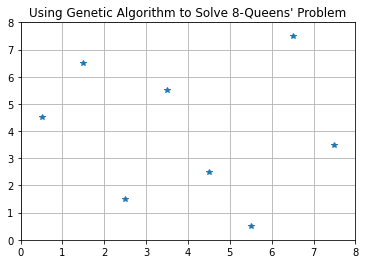

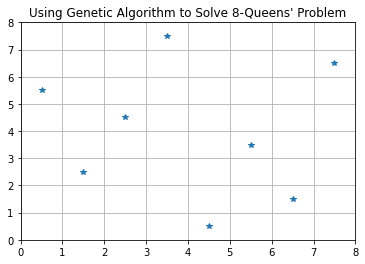

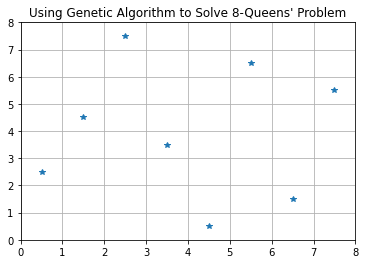

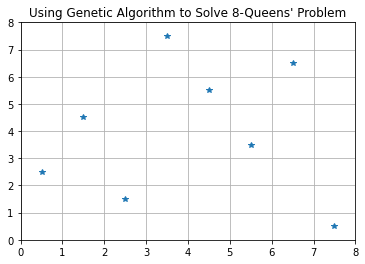

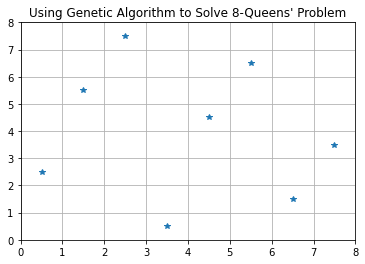

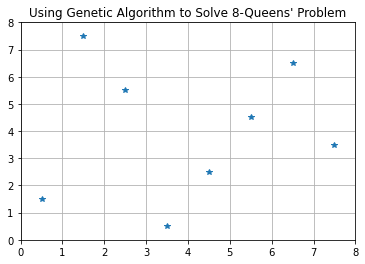

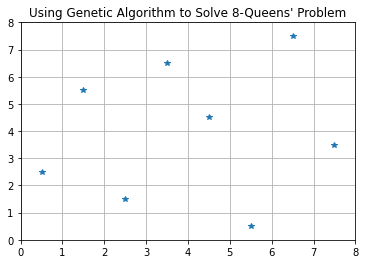

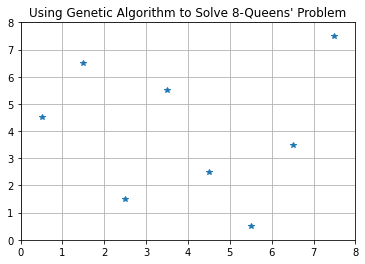

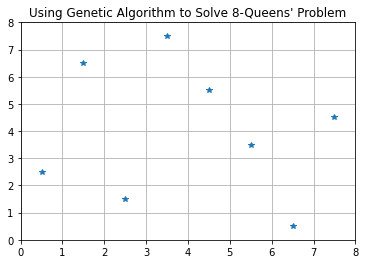

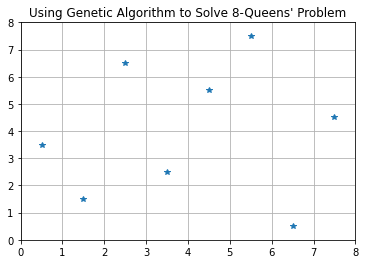

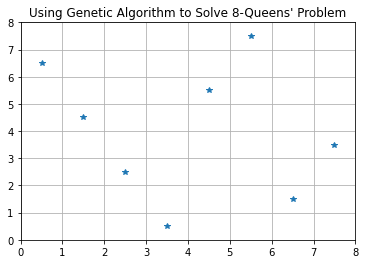

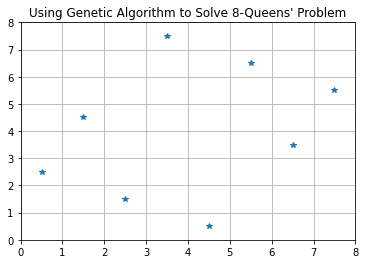

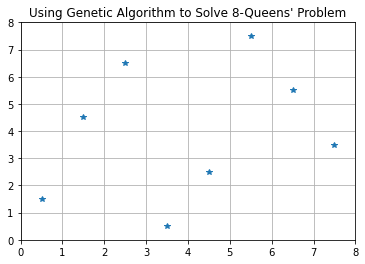

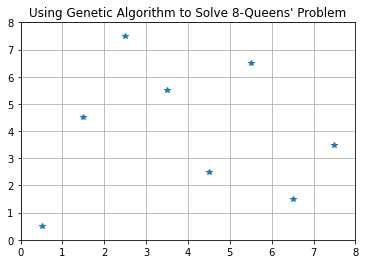

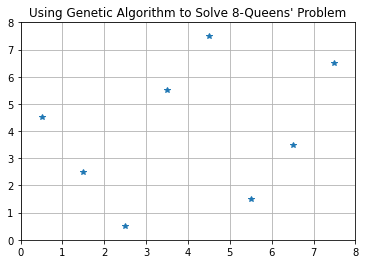

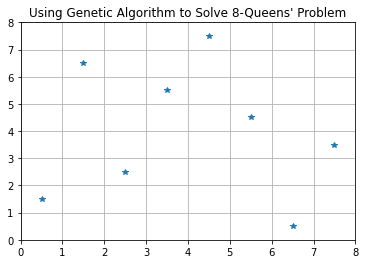

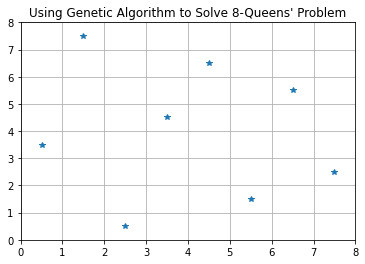

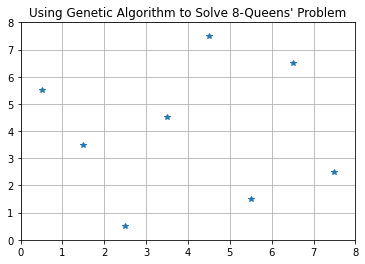

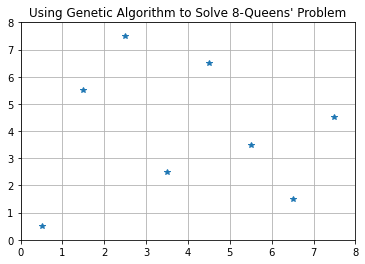

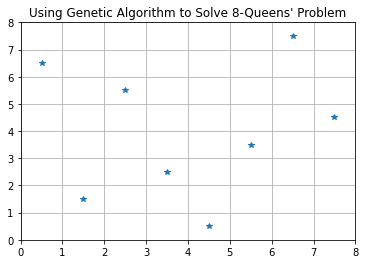

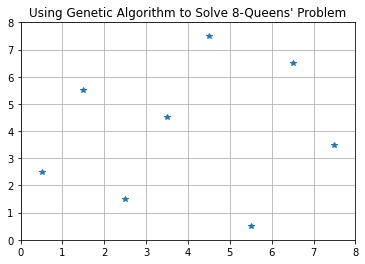

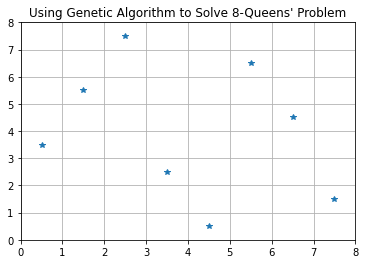

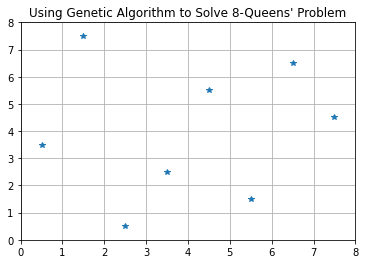

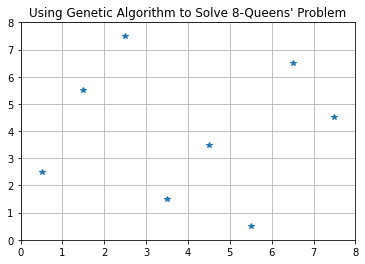

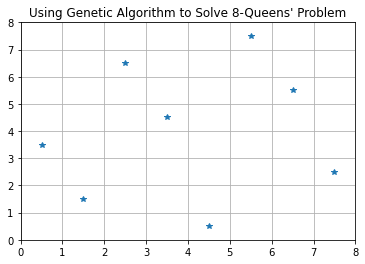

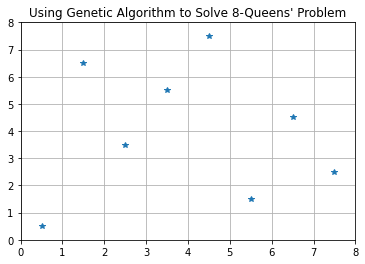

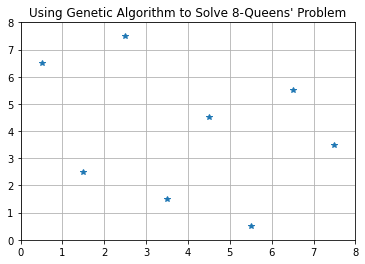

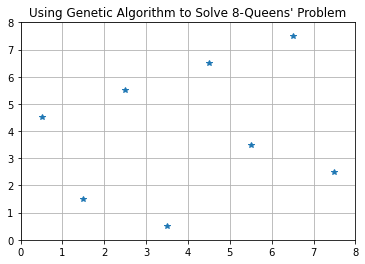

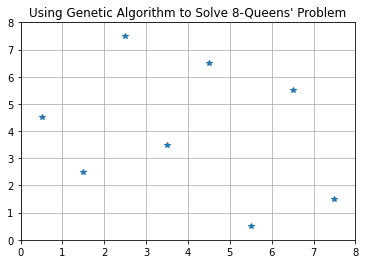

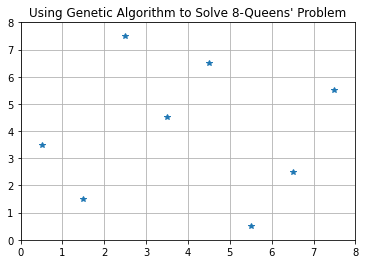

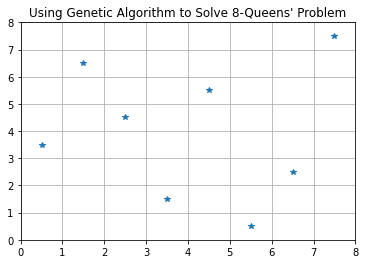

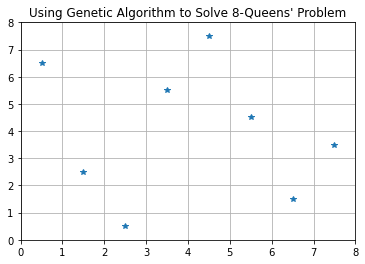

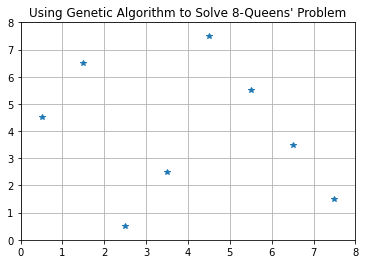

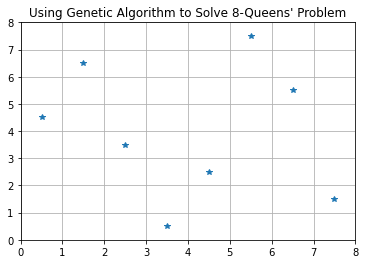

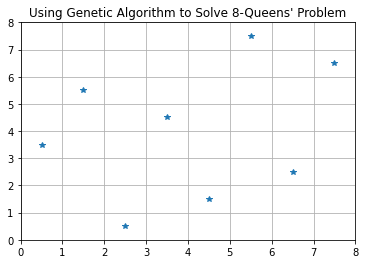

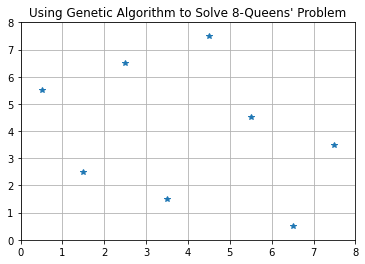

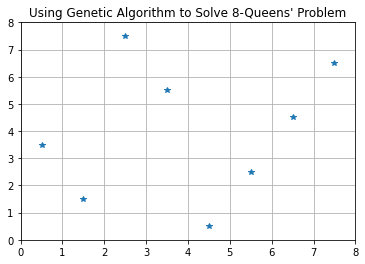

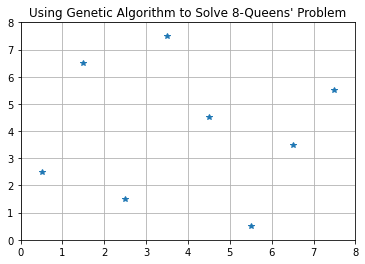

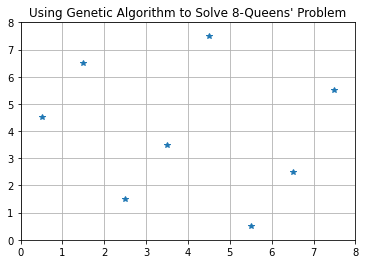

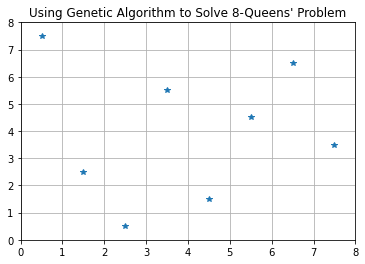

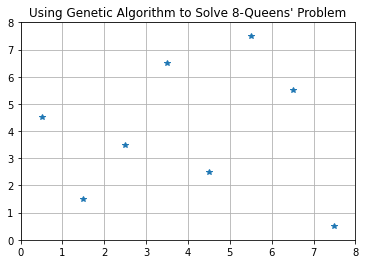

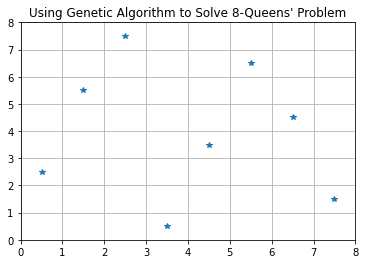

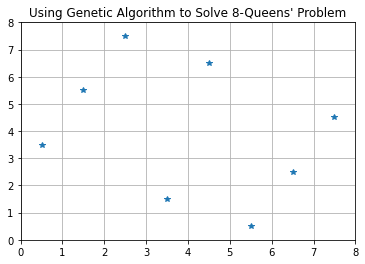

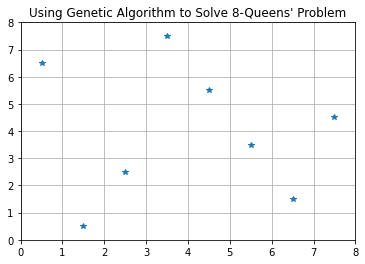

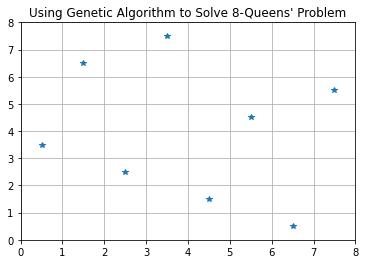

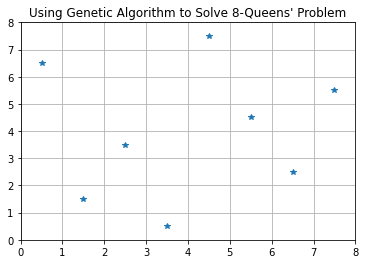

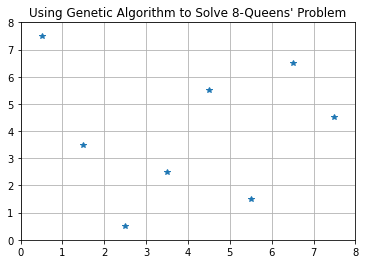

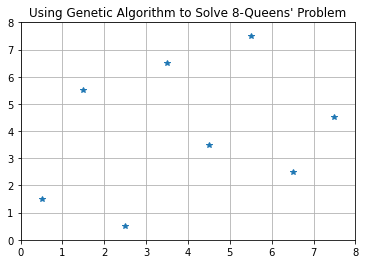

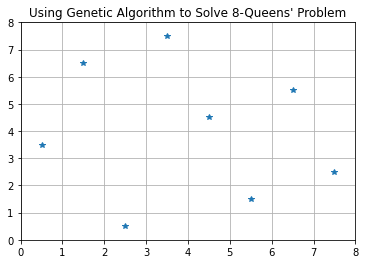

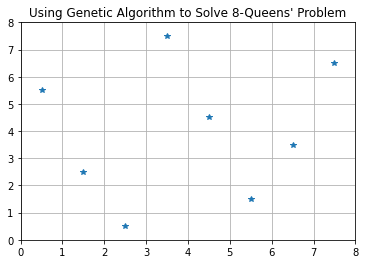

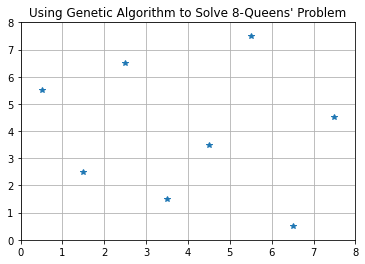

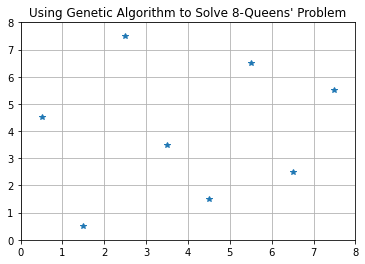

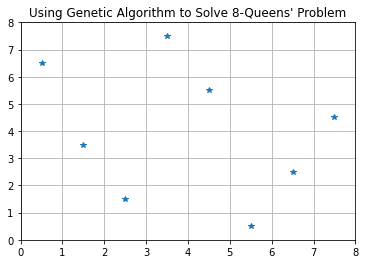

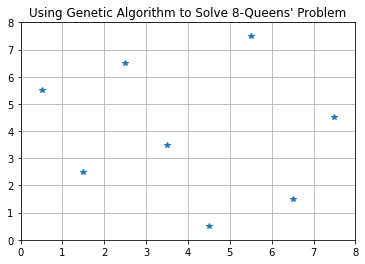

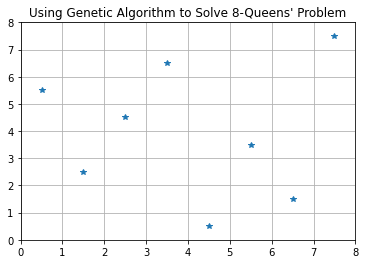

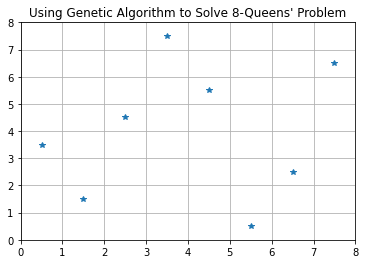

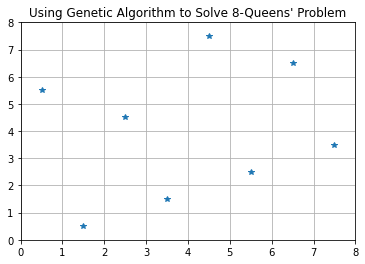

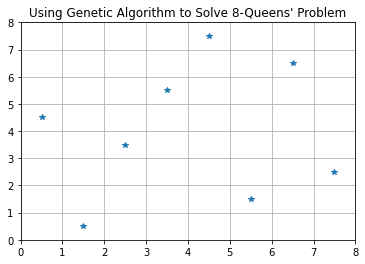

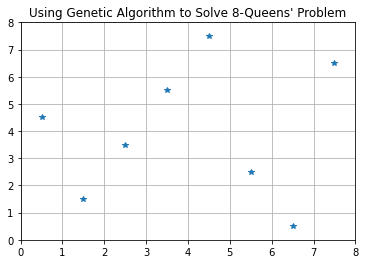

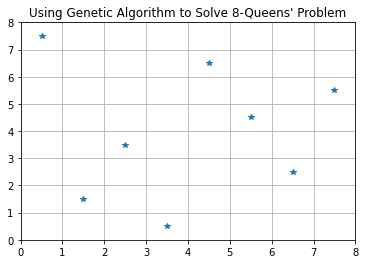

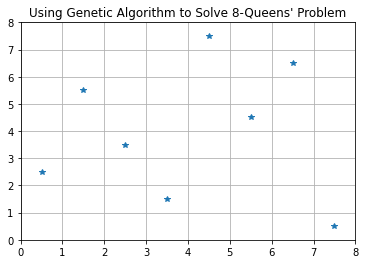

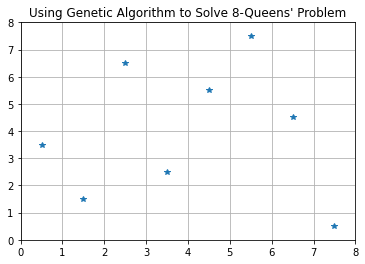

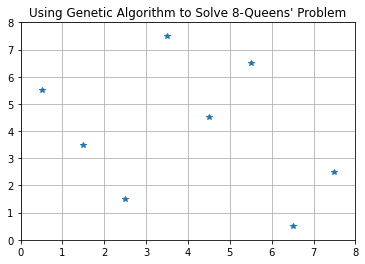

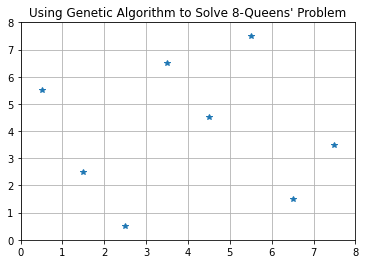

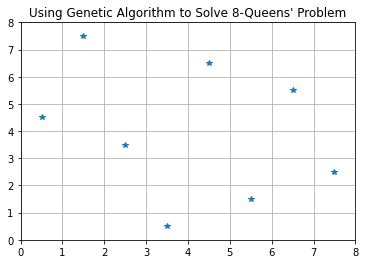

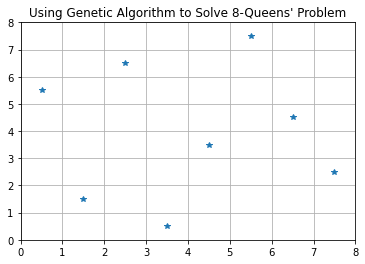

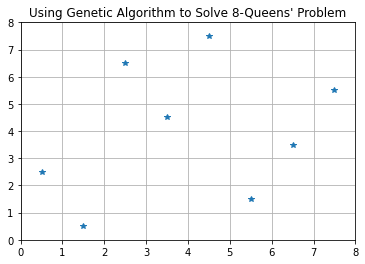

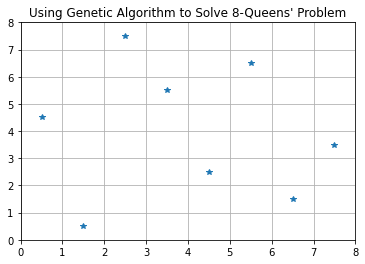

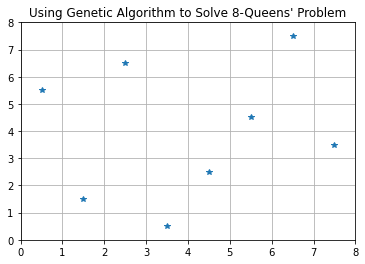

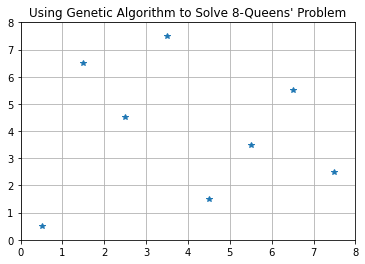

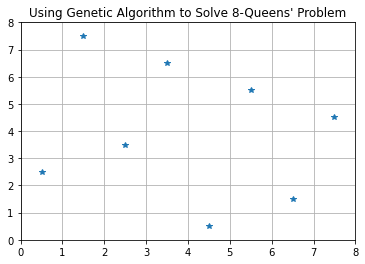

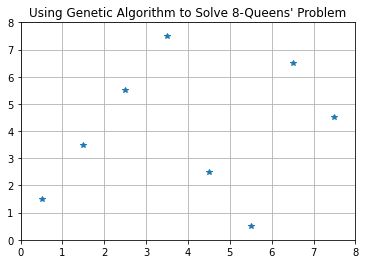

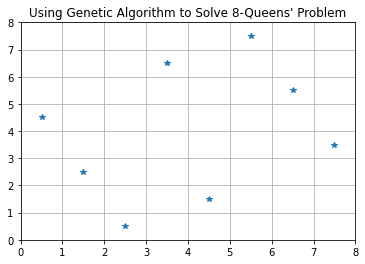

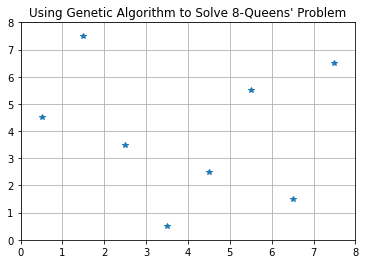

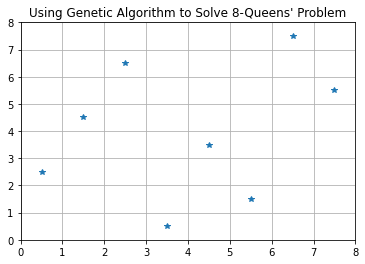

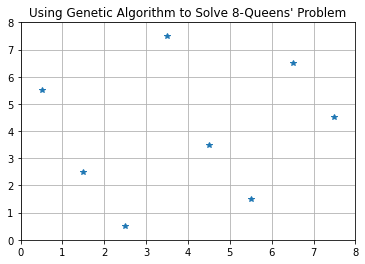

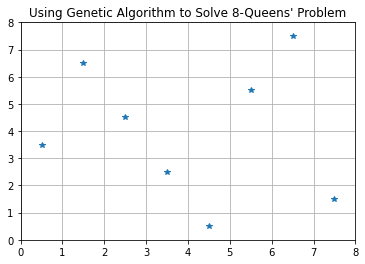

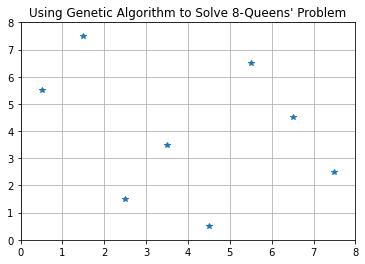

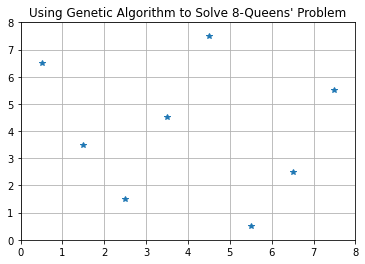

In [32]:
print("\n\n")
for success_queen in best_queens:
    meta_evaluation_show_best_queens.visualization_queens(success_queen, meta_individual[5])
pass

# ProjectEnd